### MGMTFE 402 - UBER Case
**Week**: 0<br>
**Name**: Cyrus Gill, Ale Ledesma, Quoc Tran, Thomas Micallef, Xijia Jiang



###   


MGMTFE 402 – 2022 FALL – DATA & DECISIONS
Case – Innovation at Uber












In [1]:

# --- Load packages ---
library(dplyr)
library(stargazer)
library(tidyverse)
options(width=120, repr.plot.width=8, repr.plot.height=3, repr.plot.res=200, jupyter.plot_mimetypes='image/png') # options for displaying outputs/graphs
theme_set(theme_light()) 





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
### Q1 Data: 1. 
The case material notes that Uber plans for an odd number of switchbacks per day. Use a simple
regression model (i.e, single explanatory variable) to test whether there was proper
randomization of treatment and control over commute periods. ###



Call:
lm(formula = treatment_5min ~ commute_period, data = uber)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5169 -0.5169  0.4832  0.4832  0.5000 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.51685    0.05344   9.671   <2e-16 ***
commute_period -0.01685    0.11240  -0.150    0.881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5042 on 113 degrees of freedom
Multiple R-squared:  0.0001989,	Adjusted R-squared:  -0.008649 
F-statistic: 0.02248 on 1 and 113 DF,  p-value: 0.8811


Warning message in geom_histogram(stat = "count", position = "dodge", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


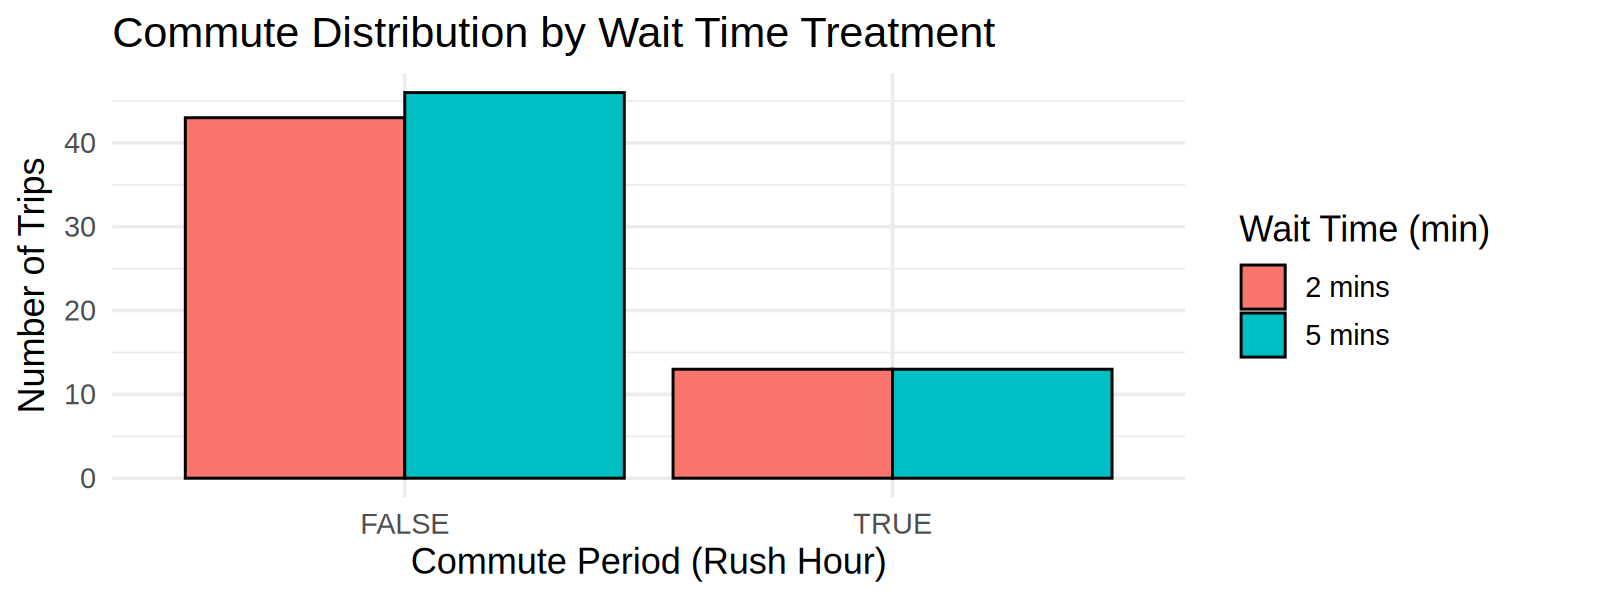

In [2]:

# Load necessary libraries
library(tidyverse)

# Load the data
uber <- read.csv("data/uber_switchback.csv")

# Rename variables (for convenience)
uber <- uber %>%
  rename(
    treatment_5min = treat,
    commute_period = commute
  )

# Convert logicals to numeric (TRUE = 1, FALSE = 0)
uber <- uber %>%
  mutate(
    treatment_5min = as.numeric(treatment_5min),
    commute_period = as.numeric(commute_period)
  )

# Simple regression: test randomization
rand_test <- lm(treatment_5min ~ commute_period, data = uber)
summary(rand_test)

library(tidyverse)

# Step 1: load and prepare the data
uber_data <- read.csv("data/uber_switchback.csv") %>%
  mutate(
    wait_time = as.factor(wait_time),
    commute   = as.factor(commute)
  )

# Step 2: visualize
ggplot(uber_data, aes(x = commute, fill = wait_time)) +
  geom_histogram(stat = "count", position = "dodge", color = "black") +
  labs(
    title = "Commute Distribution by Wait Time Treatment",
    x = "Commute Period (Rush Hour)",
    y = "Number of Trips",
    fill = "Wait Time (min)"
  ) +
  theme_minimal(base_size = 13)


In [ ]:
2. The data is missing some important information about revenue. Let us make some assumptions.
Construct a new column named “total_revenue”, that calculates total revenue for that period
based on an average $15 revenue from pool trips and an average $9 from express trips (i.e.,
“total_revenue=(15*trips_pool)+(9*trips_express)”). We will assume other types of Uber rides
(e.g., UberX) are not important for this analysis.

In [3]:
# Load necessary libraries
library(tidyverse)

# Load the data
uber <- read.csv("data/uber_switchback.csv")

# Rename variables (for convenience)
uber <- uber %>%
  rename(
    treatment_5min = treat,
    commute_period = commute
  )

# Convert logicals to numeric (TRUE = 1, FALSE = 0)
uber <- uber %>%
  mutate(
    treatment_5min = as.numeric(treatment_5min),
    commute_period = as.numeric(commute_period)
  )

# Simple regression: test randomization
rand_test <- lm(treatment_5min ~ commute_period, data = uber)
summary(rand_test)


# Create total_revenue variable
uber <- uber %>%
  mutate(
    total_revenue = (15 * trips_pool) + (9 * trips_express)
  )

# Quick check
summary(uber$total_revenue)
head(uber %>% select(trips_pool, trips_express, total_revenue))


Call:
lm(formula = treatment_5min ~ commute_period, data = uber)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5169 -0.5169  0.4832  0.4832  0.5000 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.51685    0.05344   9.671   <2e-16 ***
commute_period -0.01685    0.11240  -0.150    0.881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5042 on 113 degrees of freedom
Multiple R-squared:  0.0001989,	Adjusted R-squared:  -0.008649 
F-statistic: 0.02248 on 1 and 113 DF,  p-value: 0.8811


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34614   41135   45840   46079   48764   62016 

,trips_pool,trips_express,total_revenue
,<dbl>,<dbl>,<dbl>
1,1415,3245,50430
2,1461,2363,43182
3,1362,2184,40086
4,1984,3584,62016
5,1371,2580,43785
6,1401,2022,39213


In [ ]:
3. Use single explanatory variable regressions to analyze the effect of the 5-min treatment on each
of “total_driver_payout”, “total_revenue”, “trips_pool”, “trips_express”, “rider_cancellations”,
“total_matches” and “total_double_matches”. You are running 7 separate regressions. Report
the 7 regression models together using the stargazer() function in the write-up.

In [4]:


# Check column names to confirm
names(uber)

# Ensure treatment and commute are numeric
uber <- uber %>%
  mutate(
    treatment_5min = as.numeric(treatment_5min),
    commute_period = as.numeric(commute_period)
  )

# Create total revenue variable
uber <- uber %>%
  mutate(
    total_revenue = (15 * trips_pool) + (9 * trips_express)
  )

# 7 separate regressions
reg1 <- lm(total_driver_payout ~ treatment_5min, data = uber)
reg2 <- lm(total_revenue ~ treatment_5min, data = uber)
reg3 <- lm(trips_pool ~ treatment_5min, data = uber)
reg4 <- lm(trips_express ~ treatment_5min, data = uber)
reg5 <- lm(rider_cancellations ~ treatment_5min, data = uber)
reg6 <- lm(total_matches ~ treatment_5min, data = uber)
reg7 <- lm(total_double_matches ~ treatment_5min, data = uber)

# Combine results with stargazer
stargazer(
  reg1, reg2, reg3, reg4, reg5, reg6, reg7,
  type = "text",
  title = "Effect of 5-Min Wait Treatment on Key Performance Metrics",
  dep.var.labels = c(
    "Total Driver Payout", "Total Revenue", "Pool Trips", 
    "Express Trips", "Rider Cancellations", "Total Matches", "Double Matches"
  ),
  covariate.labels = c("5-Min Wait Treatment"),
  omit.stat = c("f", "ser")
)

[1] "city_id"              "period_start"         "wait_time"            "treatment_5min"       "commute_period"      
 [6] "trips_pool"           "trips_express"        "rider_cancellations"  "total_driver_payout"  "total_matches"       
[11] "total_double_matches" "total_revenue"


Effect of 5-Min Wait Treatment on Key Performance Metrics
                                                                  Dependent variable:                                             
                     -------------------------------------------------------------------------------------------------------------
                     Total Driver Payout Total Revenue  Pool Trips  Express Trips Rider Cancellations Total Matches Double Matches
                             (1)              (2)          (3)           (4)              (5)              (6)           (7)      
----------------------------------------------------------------------------------------------------------------------------------
5-Min Wait Treatment    -3,162.504***     -1,845.474      66.222     -315.422***       28.564***       -389.002***      -9.444    
                         (1,175.194)      (1,114.761)    (47.395)     (76.756)         (10.487)         (107.512)      (62.742)   
                        

In [ ]:
4. Interpret the results of your regression models in Question 3, considering the statistical
significance of the results. Decide whether you will interpret it causally or not. Pay attention to
the Data Dictionary in providing your interpretation. Does it conform with the summary of the
data reported in the case material (page 22 on the course reader, page 14 of the case)?

## The results of treating the users with a 5 minute wait time is statisically significant to the 0.01%
## and decreased following dependent variables:
## total driver payout, express trips rider, rider cancellations, total matches
## See word document

In [ ]:

5. Let us focus on the outcome variables of “total_driver_payout” and “total_revenue”. Propose
regression models to analyze whether the 5-min treatment had different effects during
commuting and non-commuting periods. Report the regression using the stargazer() function
and include it in the write-up. Interpret the results, considering the statistical significance.

In [5]:
# Load libraries
library(tidyverse)
library(stargazer)

df <- read_csv("data/uber_switchback.csv", show_col_types = FALSE) %>%
  mutate(
    treat = as.numeric(treat),
    commute = as.numeric(commute),
    total_revenue = (15 * replace_na(trips_pool, 0)) + (9 * replace_na(trips_express, 0)),
    # New combined business outcome variable
    profit = total_revenue - total_driver_payout
  )

# Regression 1: total_driver_payout
model_payout <- lm(total_driver_payout ~ treat * commute, data = df)

# Regression 2: total_revenue
model_revenue <- lm(total_revenue ~ treat * commute, data = df)

# Regression 3: profit (combined business outcome)
model_profit <- lm(profit ~ treat * commute, data = df)

# Report the three models together
stargazer(
  model_payout, model_revenue, model_profit,
  title = "Effect of 5-min Treatment During Commute vs. Non-Commute Periods",
  column.labels = c("Driver Payout", "Revenue", "Profit (Revenue - Payout)"),
  covariate.labels = c("5-min Treatment (treat)",
                       "Commute Period (commute)",
                       "Treatment × Commute Interaction"),
  omit.stat = c("f", "ser"),
  type = "text"
)


Effect of 5-min Treatment During Commute vs. Non-Commute Periods
                                                    Dependent variable:                    
                                -----------------------------------------------------------
                                total_driver_payout total_revenue          profit          
                                   Driver Payout       Revenue    Profit (Revenue - Payout)
                                        (1)              (2)                 (3)           
-------------------------------------------------------------------------------------------
5-min Treatment (treat)            -3,076.808***     -1,263.628         1,813.180***       
                                     (657.696)        (875.432)           (554.014)        
                                                                                           
Commute Period (commute)           12,879.400***    11,298.180***        -1,581.215*       
              

In [ ]:

6. Using what you find in Question 5, make an argument for why UBER should consider different
wait times during different times of the day. Speculate what rider and driver behavior may be
driving the results that you see.

In [ ]:
7. Motivated by the results that you see in the regressions, propose a question that you can
investigate using regression modeling or a randomized experiment. State your hypothesis, what
regression you would run and speculate as to what you may find. (Maximum of 3 sentences.)
Grading

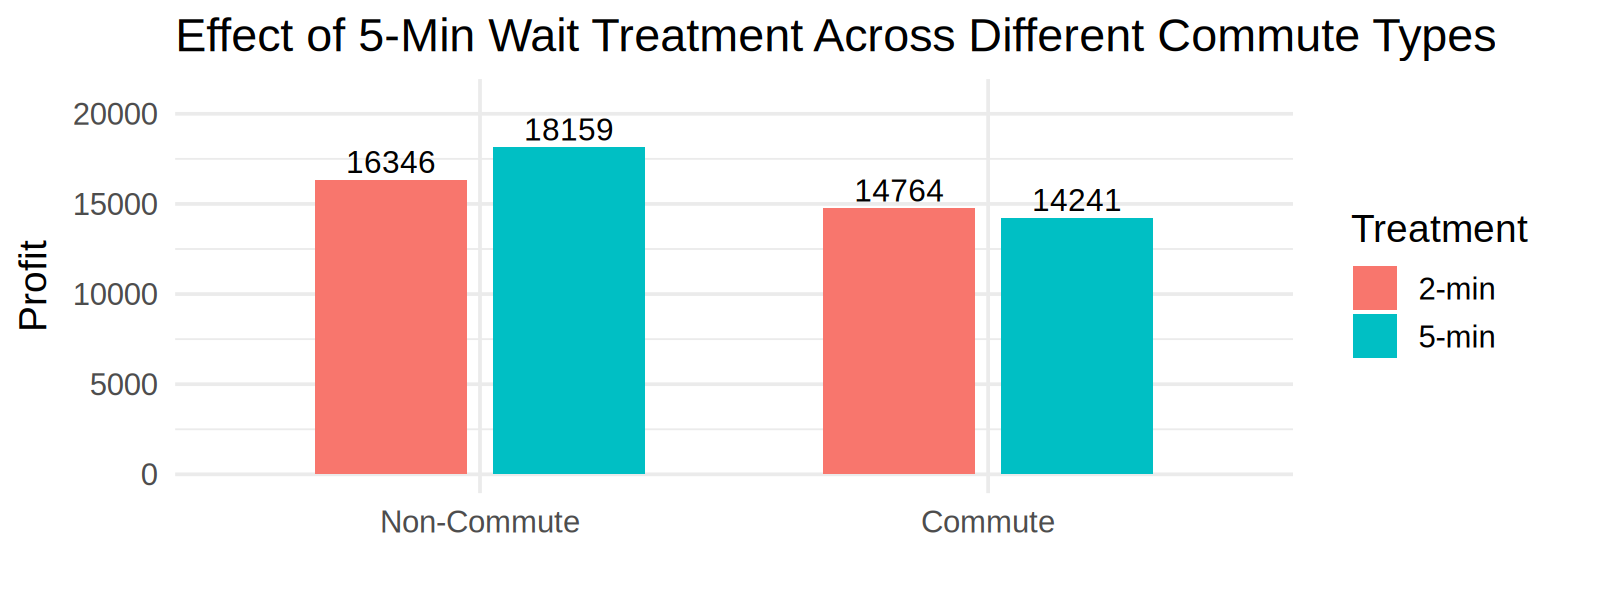

In [11]:
plot_df <- df %>%
  mutate(
    commute_label = if_else(commute == 1, "Commute", "Non-Commute"),
    treat_label   = if_else(treat == 1, "5-min", "2-min")   # <-- changed here
  ) %>%
  group_by(commute_label, treat_label) %>%
  summarise(mean_profit = mean(profit, na.rm = TRUE), .groups="drop") %>%
  mutate(
    commute_label = factor(commute_label, levels=c("Non-Commute","Commute")),
    treat_label   = factor(treat_label,   levels=c("2-min","5-min"))        # <-- order
  )

ggplot(plot_df,
       aes(x = commute_label, y = mean_profit, fill = treat_label)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.6) +
  geom_text(aes(label = round(mean_profit,0)),
            position = position_dodge(width = 0.7),
            vjust = -0.3,
            size = 4) +
  labs(
    x = "",
    y = "Profit",
    fill = "Treatment"      # <-- legend title changed
  ) +
  ggtitle("Effect of 5-Min Wait Treatment Across Different Commute Types") +
  theme_minimal(base_size = 14) +
  ylim(0, max(plot_df$mean_profit)*1.15)
